### IMPORT LIBRARIES

In [2]:
import time
import re
import pandas as pd
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import requests

### OPEN WEBSITE and REJECT COOKIES

In [3]:
driver = webdriver.Chrome()
url = "https://uk.hotels.com/Hotel-Search?adults=2&d1=2026-01-29&d2=2026-01-31&destination=Palm%20Jumeirah%2C%20Dubai%2C%20Dubai%2C%20United%20Arab%20Emirates&endDate=2026-01-31&flexibility=0_DAY&isInvalidatedDate=false&lodging=HOTEL&regionId=6085142&rooms=1&semdtl=&sort=RECOMMENDED&star=50&startDate=2026-01-29&stay_options_group=hotels_option&theme=&useRewards=false&userIntent="
driver.get(url)
time.sleep(5)
driver.find_element(By.XPATH,'//*[@id="onetrust-reject-all-handler"]').click()

### GET LIST OF HOTELS

In [4]:
list_of_hotels = driver.find_elements(By.XPATH,"//*[contains(@class,'uitk-spacing-margin-blockstart-three')]")

### SCRAPE HOTEL **NAME**, **PRICE** and **RATING**

In [5]:
hotel_dict = {'names': [], 'price': [], 'rating': [], 'location': [], 'url': []}
for hotel in list_of_hotels:
    try:
        name = hotel.find_element(By.XPATH, ".//*[contains(@class,'uitk-heading-5')]").text
    except NoSuchElementException:
        name = "N/A"  # default value if not found

    try:
        price = hotel.find_element(By.XPATH, ".//*[contains(@class,'uitk-type-500')]").text
    except NoSuchElementException:
        price = "N/A"

    try:
        rating = hotel.find_element(By.XPATH, ".//span[contains(@class, 'uitk-badge-base-text') and @aria-hidden='true']").text
    except NoSuchElementException:
        rating = "N/A"
    
    try:
        location = hotel.find_element(By.XPATH, ".//*[contains(@class,'uitk-type-300')]").text
    except NoSuchElementException:
        location = "N/A"

    try:
        url = hotel.find_element(By.XPATH, ".//a[@data-stid='open-hotel-information']").get_attribute("href")
    except NoSuchElementException:
        url = "N/A"
    
    hotel_dict['names'].append(name)
    hotel_dict['price'].append(price)
    hotel_dict['rating'].append(rating)
    hotel_dict['location'].append(location)
    hotel_dict['url'].append(url)
# Get the Lana information
#driver = webdriver.Chrome()
lana_url = "https://uk.hotels.com/Hotel-Search?destination=The%20Lana%20-%20Dorchester%20Collection&regionId&selected=94894908&d1=2025-03-29&startDate=2026-01-29&d2=2025-03-31&endDate=2026-01-31&adults=2&rooms=1&isInvalidatedDate=false&theme=&userIntent=&semdtl=&useRewards=false&sort=RECOMMENDED&children=&latLong=&mapBounds="
driver.get(lana_url)
time.sleep(5)
#driver.find_element(By.XPATH,'//*[@id="onetrust-reject-all-handler"]').click()
lana_name = driver.find_element(By.XPATH, "//h3[contains(@class, 'uitk-heading-5') and @style='--uitk-layoutgrid-row-start:span 1']").text
lana_price = driver.find_element(By.XPATH, ".//*[contains(@class,'uitk-type-500')]").text
lana_rating = driver.find_element(By.XPATH, ".//span[contains(@class, 'uitk-badge-base-text') and @aria-hidden='true']").text
lana_location = driver.find_element(By.XPATH, ".//*[contains(@class,'uitk-type-300') and @aria-hidden='false']").text
lana_url = driver.find_element(By.XPATH, ".//a[@data-stid='open-hotel-information']").get_attribute("href")

hotel_dict['names'].append(lana_name)
hotel_dict['price'].append(lana_price)
hotel_dict['rating'].append(lana_rating)
hotel_dict['location'].append(lana_location)
hotel_dict['url'].append(lana_url)

hotel_df = pd.DataFrame(hotel_dict)
hotel_df = hotel_df[hotel_df['location'].isin(['Palm Jumeirah', 'Business Bay'])]
hotel_df.drop_duplicates(subset =['names'], inplace=True)
hotel_df['price'] = hotel_df['price'].str.replace('£', '', regex=False).str.replace(",", "", regex=False).astype(float)
hotel_df


,names,price,rating,location,url
0,Jumeirah Zabeel Saray Dubai,767.0,9.4,Palm Jumeirah,https://uk.hotels.com/ho364994/jumeirah-zabeel...
1,Anantara The Palm Dubai Resort,725.0,9.2,Palm Jumeirah,https://uk.hotels.com/ho442181/anantara-the-pa...
2,"Atlantis, The Palm",810.0,9.4,Palm Jumeirah,https://uk.hotels.com/ho274263/atlantis-the-pa...
3,"Dukes The Palm, a Royal Hideaway Hotel",435.0,8.8,Palm Jumeirah,https://uk.hotels.com/ho514496288/dukes-the-pa...
4,"Th8 Palm Dubai Beach Resort, Vignette Collecti...",668.0,8.6,Palm Jumeirah,https://uk.hotels.com/ho2023869184/th8-palm-by...
5,One&Only The Palm,1999.0,9.8,Palm Jumeirah,https://uk.hotels.com/ho359493/one-only-the-pa...
7,Rixos The Palm Hotel & Suites,1025.0,9.0,Palm Jumeirah,https://uk.hotels.com/ho397790/rixos-the-palm-...
8,Fairmont The Palm,630.0,9.0,Palm Jumeirah,https://uk.hotels.com/ho422392/fairmont-the-pa...
9,Kempinski Hotel & Residences Palm Jumeirah,1335.0,8.8,Palm Jumeirah,https://uk.hotels.com/ho348363/kempinski-hotel...
12,"The St. Regis Dubai, The Palm",921.0,9.6,Palm Jumeirah,https://uk.hotels.com/ho2093041856/the-st-regi...


### SCRAPE INDIVIDUAL HOTEL PAGE for **REVIEW CRITERIA** and **SCORE** 

In [6]:
urls = hotel_df["url"].tolist()

# A list to hold data for all hotels
hotels_data = []

for url in urls:
    driver.get(url)
    time.sleep(5) 
    # Extract hotel name
    try:
        names = driver.find_element(By.XPATH, "//*[contains(@class, 'uitk-heading-3')]").text
    except NoSuchElementException:
        names = "N/A"
    
    driver.find_element(By.XPATH, "//*[contains(@data-stid, 'reviews-link')]").click() # Click on the reviews button
    time.sleep(3)  # Wait for the reviews to load

    try:
        driver.find_element(By.XPATH, "//div[contains(@class, 'uitk-expando-peek-control')]//button[@aria-label='See more score categories']").click()
        time.sleep(2)
    except NoSuchElementException:
        print("See more button not found for", names)
    
    # Extract criteria and scores
    criteria_elements = driver.find_elements(By.XPATH, ".//*[contains(@class,'uitk-progress-bar-label')]")
    score_elements = driver.find_elements(By.XPATH, ".//*[contains(@class,'uitk-progress-bar-value')]")
    
    # Convert the lists to text
    criteria = [el.text for el in criteria_elements]
    scores = [el.text for el in score_elements]
    
    # Create a dictionary for this hotel.
    # Since the criteria are always the same and in the same order, I can directly zip them:
    hotel_dict = {"names": names}
    for crit, score in zip(criteria, scores):
        hotel_dict[crit] = score  # each criterion becomes a column
    
    hotels_data.append(hotel_dict)

# Convert the list of dictionaries to a DataFrame
crit_score_df = pd.DataFrame(hotels_data)
crit_score_df = crit_score_df.replace(r'/10', '', regex=True)
crit_score_df

See more button not found for The St. Regis Dubai, The Palm
See more button not found for Marriott Resort Palm Jumeirah, Dubai
See more button not found for Andaz Dubai the Palm, by Hyatt
See more button not found for The Lana - Dorchester Collection


,names,Cleanliness,Staff & service,Amenities,Property conditions & facilities,Eco-friendliness,Location,Value for money,Communication
0,Jumeirah Zabeel Saray Dubai,9.6,9.4,9.4,9.2,9.0,6.0,8.0,NaN
1,Anantara The Palm Dubai Resort,9.4,9.2,9.0,9.0,9.2,8.6,8.6,NaN
2,"Atlantis, The Palm",9.8,9.6,9.8,9.6,9.4,9.4,9.0,NaN
3,"Dukes The Palm, a Royal Hideaway Hotel",9.2,9.0,9.0,8.8,8.6,8.0,NaN,NaN
4,"Th8 Palm Dubai Beach Resort, Vignette Collecti...",9.4,9.0,8.6,9.2,8.8,NaN,NaN,6.4
5,One&Only The Palm,10,9.8,10,10,9.8,9.2,NaN,NaN
6,Rixos The Palm Hotel & Suites,9.2,9.0,9.2,8.8,8.8,8.2,8.0,NaN
7,Fairmont The Palm,9.2,9.2,9.2,8.8,8.6,10,NaN,NaN
8,Kempinski Hotel & Residences Palm Jumeirah,9.2,8.8,9.4,9.0,9.4,8.2,7.6,8.8
9,"The St. Regis Dubai, The Palm",10,9.8,9.8,9.8,9.6,NaN,NaN,NaN


### SCRAPE INDIVIDUAL LISTINGS for **ROOM TYPES**

In [16]:
from collections import Counter
hotel_room_data = []

for url in urls:
    driver.get(url)
    time.sleep(5)

    # Optionally, extract hotel name to identify the row
    try:
        name = driver.find_element(By.XPATH, "//*[contains(@class, 'uitk-heading-4')]").text
    except NoSuchElementException:
        name = "NA" 

    # Get all <li> elements from the <ul> that contains the list of features
    li_elements = driver.find_elements(By.XPATH, ".//ul[contains(@class, 'uitk-typelist')]/li")
    
    # Use a Counter to track occurrences of any text that starts with "sleeps"
    local_counter = Counter()
    for li in li_elements:
        text = li.text.strip()
        if text.lower().startswith("sleeps"):
            local_counter[text] += 1

    hotel_dict = {"names": name}
    
    for sleep_key, count in local_counter.items():
        if sleep_key.lower().startswith("sleeps"):
            hotel_dict[sleep_key] = count

    hotel_room_data.append(hotel_dict)


room_df = pd.DataFrame(hotel_room_data)
room_df = room_df.fillna(0)
room_df.set_index("names", inplace=True)

sleeps_columns = [col for col in room_df.columns if col.lower().startswith("sleeps")]
other_columns = [col for col in room_df.columns if not col.lower().startswith("sleeps")]

# Sort the "Sleeps" columns by the numeric value after the word "Sleeps"
sleeps_columns_sorted = sorted(sleeps_columns, key=lambda x: int(x.split()[1]))

new_order = other_columns + sleeps_columns_sorted
room_df = room_df[new_order]
room_df

,Sleeps 2,Sleeps 3,Sleeps 4,Sleeps 5,Sleeps 6,Sleeps 7,Sleeps 8,Sleeps 9,Sleeps 10,Sleeps 12
names,,,,,,,,,,
Jumeirah Zabeel Saray Dubai,0.0,3.0,6.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0
Anantara The Palm Dubai Resort,0.0,3.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"Atlantis, The Palm",0.0,8.0,16.0,0.0,9.0,2.0,0.0,0.0,0.0,0.0
"Dukes The Palm, a Royal Hideaway Hotel",0.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Th8 Palm Dubai Beach Resort, Vignette Collection by IHG",4.0,1.0,5.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0
One&Only The Palm,0.0,0.0,12.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Rixos The Palm Hotel & Suites,1.0,2.0,4.0,0.0,3.0,0.0,1.0,1.0,2.0,0.0
Fairmont The Palm,0.0,6.0,5.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
Kempinski Hotel & Residences Palm Jumeirah,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,1.0,1.0


### COMBINE INTO FINAL DATA FRAME

In [21]:
combine_df = pd.merge(hotel_df, crit_score_df, on='names', how='inner')
combined_df = pd.merge(combine_df, room_df, on='names', how='inner')
final_df = combined_df.drop(columns=['url', 'location'])
final_df

,names,price,rating,Cleanliness,Staff & service,Amenities,Property conditions & facilities,Eco-friendliness,Location,Value for money,...,Sleeps 2,Sleeps 3,Sleeps 4,Sleeps 5,Sleeps 6,Sleeps 7,Sleeps 8,Sleeps 9,Sleeps 10,Sleeps 12
0,Jumeirah Zabeel Saray Dubai,767.0,9.4,9.6,9.4,9.4,9.2,9.0,6.0,8.0,...,0.0,3.0,6.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0
1,Anantara The Palm Dubai Resort,725.0,9.2,9.4,9.2,9.0,9.0,9.2,8.6,8.6,...,0.0,3.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Atlantis, The Palm",810.0,9.4,9.8,9.6,9.8,9.6,9.4,9.4,9.0,...,0.0,8.0,16.0,0.0,9.0,2.0,0.0,0.0,0.0,0.0
3,"Dukes The Palm, a Royal Hideaway Hotel",435.0,8.8,9.2,9.0,9.0,8.8,8.6,8.0,NaN,...,0.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Th8 Palm Dubai Beach Resort, Vignette Collecti...",668.0,8.6,9.4,9.0,8.6,9.2,8.8,NaN,NaN,...,4.0,1.0,5.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0
5,One&Only The Palm,1999.0,9.8,10,9.8,10,10,9.8,9.2,NaN,...,0.0,0.0,12.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,Rixos The Palm Hotel & Suites,1025.0,9.0,9.2,9.0,9.2,8.8,8.8,8.2,8.0,...,1.0,2.0,4.0,0.0,3.0,0.0,1.0,1.0,2.0,0.0
7,Fairmont The Palm,630.0,9.0,9.2,9.2,9.2,8.8,8.6,10,NaN,...,0.0,6.0,5.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Kempinski Hotel & Residences Palm Jumeirah,1335.0,8.8,9.2,8.8,9.4,9.0,9.4,8.2,7.6,...,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,1.0,1.0
9,"The St. Regis Dubai, The Palm",921.0,9.6,10,9.8,9.8,9.8,9.6,NaN,NaN,...,2.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


### ANALYSIS and VISUALIZATION

#### Calculate the average

In [22]:
# Convert all columns (except 'names') to numeric, coercing errors.
numeric_cols = final_df.columns[1:]
final_df[numeric_cols] = final_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Calculate the average for columns from the second onward, excluding the last row (The Lana).
avg_values = final_df.iloc[:-1, 1:].mean().round(1)

# Create a new row with the averages.
new_row = {'names': 'Average (excluding The Lana)'}
for col, value in avg_values.items():
    new_row[col] = value

# Append the new row to the DataFrame.
final_df = pd.concat([final_df, pd.DataFrame([new_row])], ignore_index=True)
final_df


,names,price,rating,Cleanliness,Staff & service,Amenities,Property conditions & facilities,Eco-friendliness,Location,Value for money,...,Sleeps 2,Sleeps 3,Sleeps 4,Sleeps 5,Sleeps 6,Sleeps 7,Sleeps 8,Sleeps 9,Sleeps 10,Sleeps 12
0,Jumeirah Zabeel Saray Dubai,767.0,9.4,9.6,9.4,9.4,9.2,9.0,6.0,8.0,...,0.0,3.0,6.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0
1,Anantara The Palm Dubai Resort,725.0,9.2,9.4,9.2,9.0,9.0,9.2,8.6,8.6,...,0.0,3.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Atlantis, The Palm",810.0,9.4,9.8,9.6,9.8,9.6,9.4,9.4,9.0,...,0.0,8.0,16.0,0.0,9.0,2.0,0.0,0.0,0.0,0.0
3,"Dukes The Palm, a Royal Hideaway Hotel",435.0,8.8,9.2,9.0,9.0,8.8,8.6,8.0,NaN,...,0.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Th8 Palm Dubai Beach Resort, Vignette Collecti...",668.0,8.6,9.4,9.0,8.6,9.2,8.8,NaN,NaN,...,4.0,1.0,5.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0
5,One&Only The Palm,1999.0,9.8,10.0,9.8,10.0,10.0,9.8,9.2,NaN,...,0.0,0.0,12.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,Rixos The Palm Hotel & Suites,1025.0,9.0,9.2,9.0,9.2,8.8,8.8,8.2,8.0,...,1.0,2.0,4.0,0.0,3.0,0.0,1.0,1.0,2.0,0.0
7,Fairmont The Palm,630.0,9.0,9.2,9.2,9.2,8.8,8.6,10.0,NaN,...,0.0,6.0,5.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Kempinski Hotel & Residences Palm Jumeirah,1335.0,8.8,9.2,8.8,9.4,9.0,9.4,8.2,7.6,...,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,1.0,1.0
9,"The St. Regis Dubai, The Palm",921.0,9.6,10.0,9.8,9.8,9.8,9.6,NaN,NaN,...,2.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Visualization

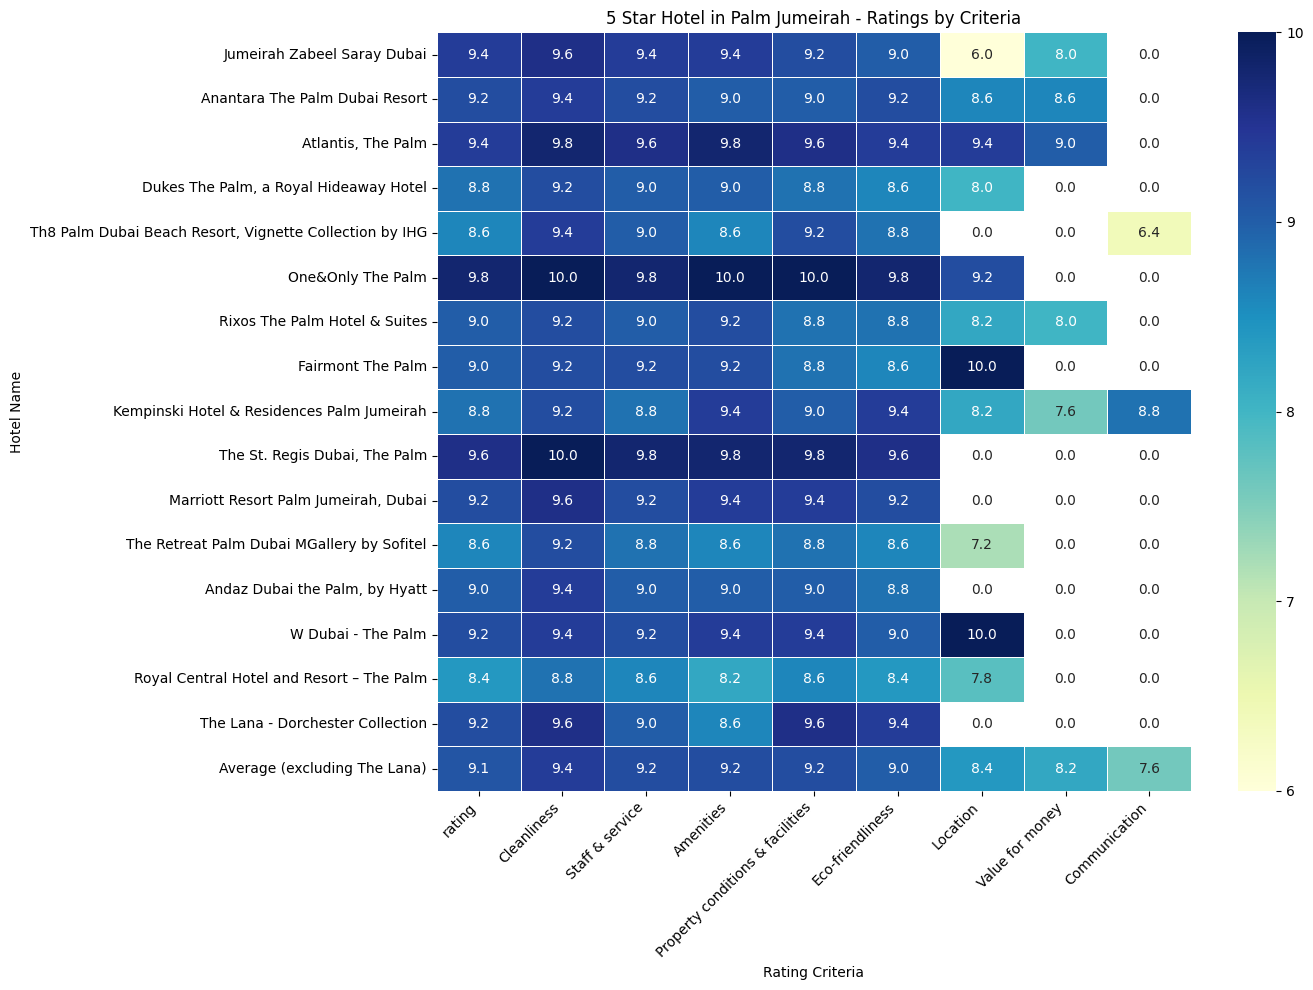

In [23]:
df = final_df
criteria_cols = [
    "rating", "Cleanliness", "Staff & service", "Amenities",
    "Property conditions & facilities", "Eco-friendliness",
    "Location", "Value for money", "Communication"
]

# Convert columns to numeric and fill NaN values.
df[criteria_cols] = df[criteria_cols].apply(pd.to_numeric, errors='coerce')
df[criteria_cols] = df[criteria_cols].fillna(0)

# Create a DataFrame for the heatmap with hotel names as rows and criteria as columns.
heatmap_data = df.set_index('names')[criteria_cols]

# Create a copy of the colormap and set the color for values under vmin to white.
cmap = plt.get_cmap("YlGnBu").copy()
cmap.set_under("white")

plt.figure(figsize=(14, 10))
# Normalize the values such that values between 8 and 10 are mapped on the colormap.
norm = mcolors.Normalize(vmin=6, vmax=10)
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap=cmap, norm=norm,
            linewidths=0.5, cbar_kws={'ticks':[ 6, 7, 8, 9, 10]})
plt.title("5 Star Hotel in Palm Jumeirah - Ratings by Criteria")
plt.xlabel("Rating Criteria")
plt.ylabel("Hotel Name")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


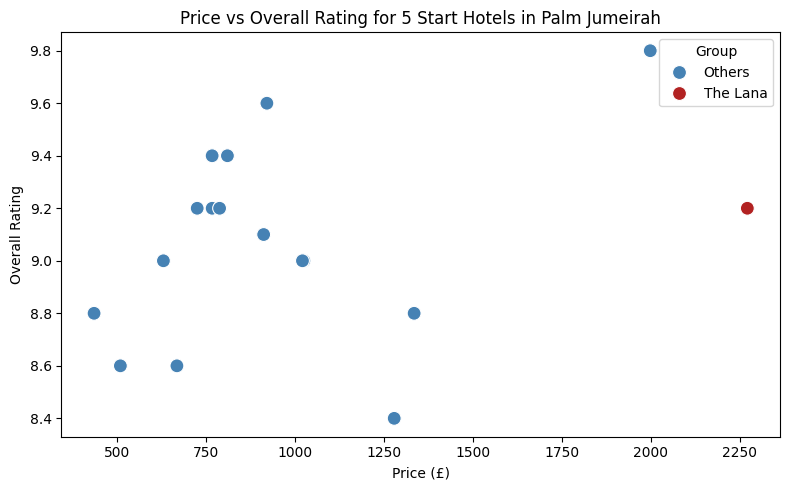

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column that flags "The Lana - Dorchester Collection" vs. others.
df['highlight'] = df['names'].apply(lambda x: 'The Lana' if x == 'The Lana - Dorchester Collection' else 'Others')

# Set up the plot
plt.figure(figsize=(8, 5))

# Create a scatter plot using the "highlight" column as the hue.
sns.scatterplot(data=df, x='price', y='rating', hue='highlight',
                palette={'The Lana': 'firebrick', 'Others': 'steelblue'}, s=100)

# Remove the hotel names text annotations by commenting out or deleting the following loop.
# for idx, row in df.iterrows():
#     plt.text(row['price'] + 10, row['rating'], row['names'], fontsize=9)

plt.title("Price vs Overall Rating for 5 Start Hotels in Palm Jumeirah")
plt.xlabel("Price (£)")
plt.ylabel("Overall Rating")
plt.legend(title='Group')
plt.tight_layout()
plt.show()


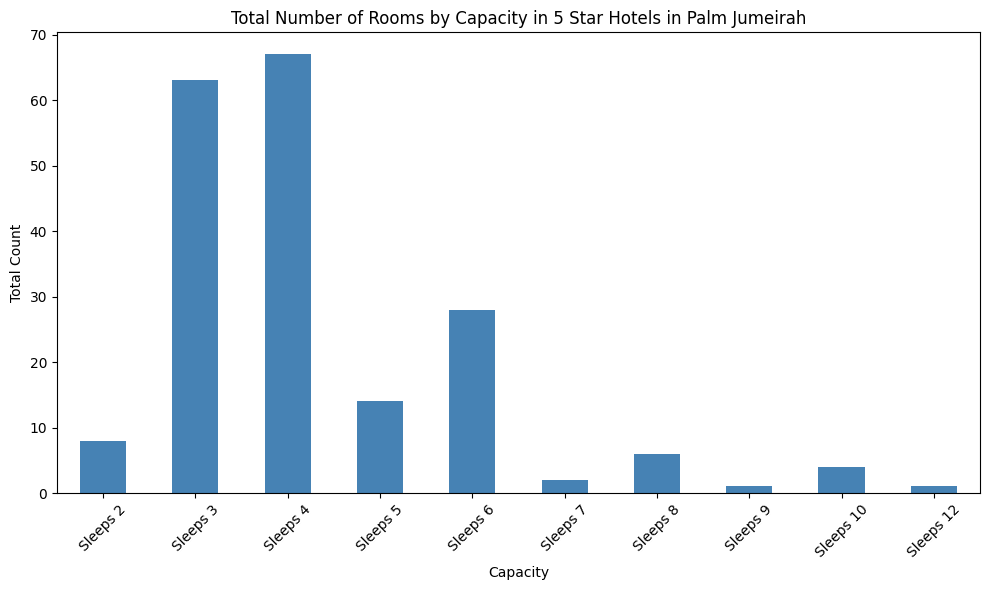

In [25]:
import matplotlib.pyplot as plt

# Identify all columns that start with "Sleeps"
sleeps_cols = [col for col in final_df.columns if col.startswith("Sleeps")]

# Exclude the last two rows (The Lana and Average)
sleeps_sum = final_df.iloc[:-2][sleeps_cols].sum()

plt.figure(figsize=(10, 6))
sleeps_sum.plot(kind="bar", color="steelblue")
plt.title("Total Number of Rooms by Capacity in 5 Star Hotels in Palm Jumeirah")
plt.xlabel("Capacity")
plt.ylabel("Total Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


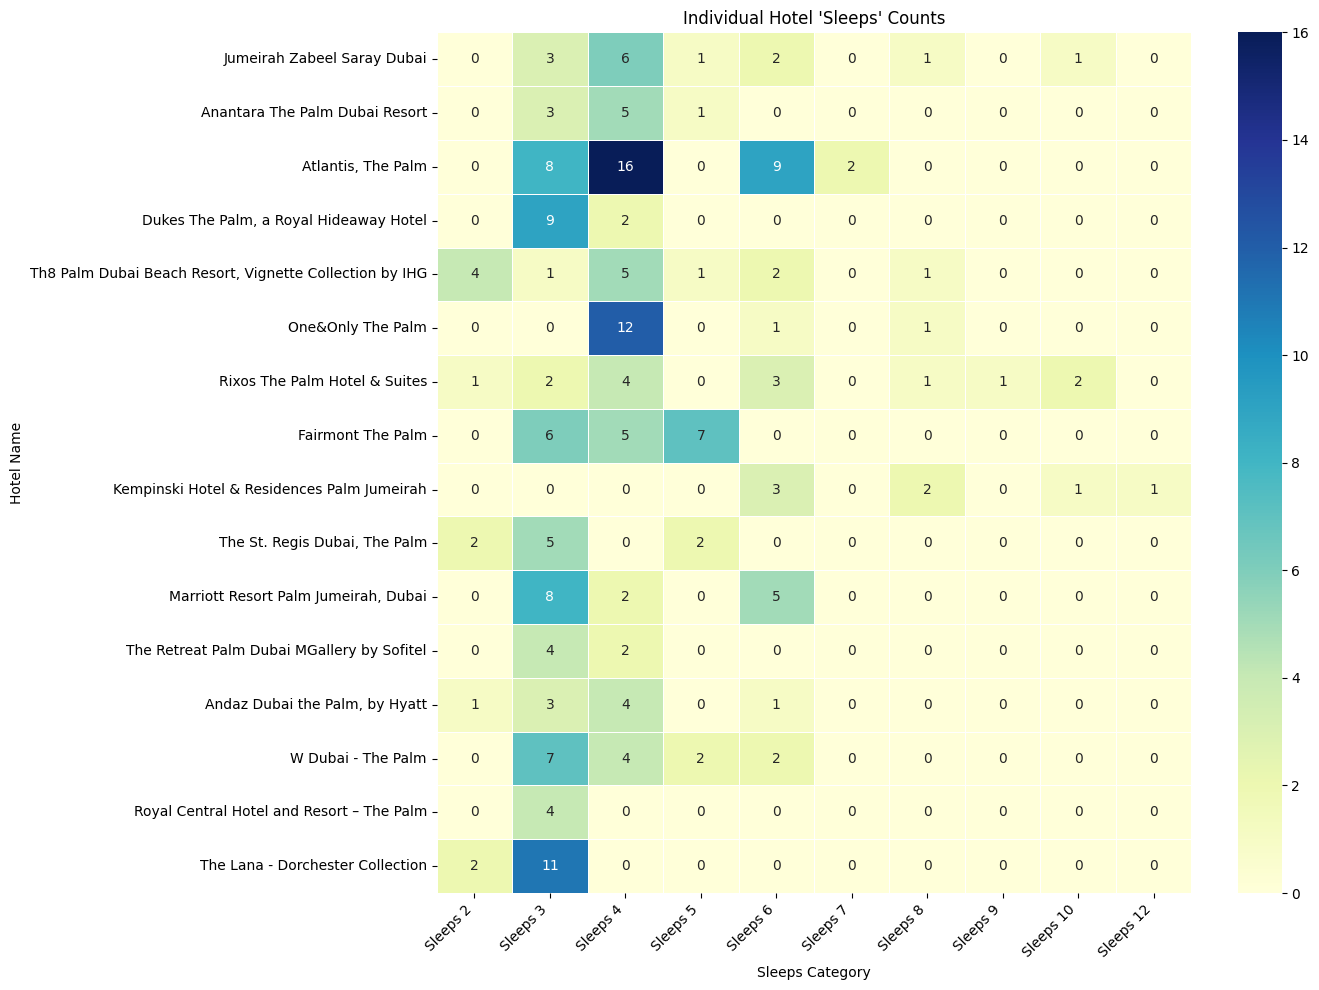

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the "Sleeps" columns
sleeps_cols = [col for col in final_df.columns if col.startswith("Sleeps")]

# Exclude the last two rows (for example, if these contain aggregated data)
df_hotels = final_df.iloc[:-1].copy()

# Convert the sleeps columns to numeric (if not already) and fill NaN values with 0
df_hotels[sleeps_cols] = df_hotels[sleeps_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# Create a DataFrame for the heatmap using hotel names as the index
heatmap_data = df_hotels.set_index('names')[sleeps_cols]

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Individual Hotel 'Sleeps' Counts")
plt.xlabel("Sleeps Category")
plt.ylabel("Hotel Name")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


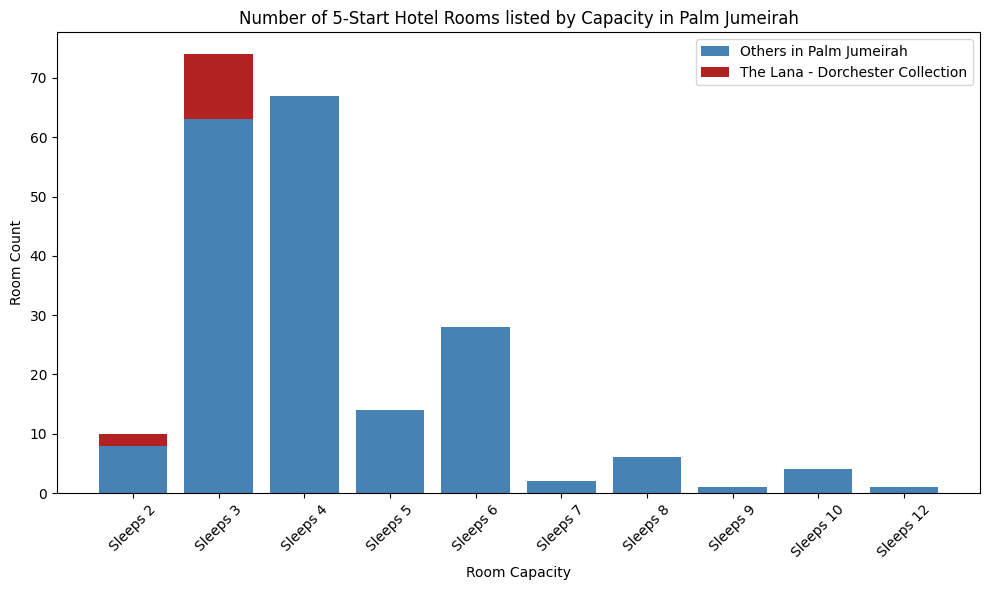

In [33]:
import matplotlib.pyplot as plt

# Identify all "Sleeps" columns
sleeps_cols = [col for col in final_df.columns if col.startswith("Sleeps")]

# Filter out the row for "The Lana - Dorchester Collection" (and also exclude the "Average" row if necessary)
others_df = final_df[(final_df["names"] != "The Lana - Dorchester Collection") & 
                     (final_df["names"] != "Average (excluding The Lana)")]

# Sum up the counts for each Sleeps category for the other hotels.
others_sum = others_df[sleeps_cols].sum()

# Get The Lana's counts (assuming there's only one row for The Lana)
lana_row = final_df[final_df["names"] == "The Lana - Dorchester Collection"]
if not lana_row.empty:
    lana_counts = lana_row[sleeps_cols].iloc[0]
else:
    lana_counts = [0] * len(sleeps_cols)  # fallback if The Lana row isn't found

plt.figure(figsize=(10, 6))

# Plot the others' contribution (blue)
plt.bar(sleeps_cols, others_sum, color="steelblue", label="Others in Palm Jumeirah")

# Plot The Lana's contribution on top of the others (red)
plt.bar(sleeps_cols, lana_counts, bottom=others_sum, color="firebrick", label="The Lana - Dorchester Collection")

plt.title("Number of 5-Start Hotel Rooms listed by Capacity in Palm Jumeirah")
plt.xlabel("Room Capacity")
plt.ylabel("Room Count")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
